# Credit Card Fraud Detection Using Unsupervised Learning
**Author**: Sarmad Salman

## Project Overview
This project focuses on detecting fraudulent credit card transactions using unsupervised machine learning techniques. 

**GitHub Repository**: [https://github.com/2salmans24/Credit-Card-Fraud-Detection-Unsupervised-ML-](#) 

### Specific Goals:
- **Compare Different Models**: Evaluate the performance of various unsupervised learning models to identify the most effective one for fraud detection.
- **Handle Class Imbalance**: Address the imbalance in the dataset, ensuring that the model is not biased towards the majority class.
- **Deploy the Best Model**: Select and finalize the best-performing model for potential deployment in a real-world fraud detection system.

## Dataset Overview
**Source**: The dataset used in this analysis is a 50% random subset of the original credit card fraud dataset from # Kaggle https://www.kaggle.com/mlg-ulb/creditcardfraud. The subset contains 72.0 MB of data.

### Original vs. Subset:
- **Original Dataset**: 284,807 transactions with 492 fraudulent transactions.
- **Subset Used**: 142,403 transactions with approximately 246 fraudulent transactions.

### Features:
- **Time**: The time elapsed between the first transaction in the dataset and each subsequent transaction.
- **Amount**: The transaction amount.
- **V1 to V28**: Principal components obtained with PCA (anonymized features).
- **Class**: The target variable (0 = legitimate transaction, 1 = fraudulent transaction).

## Data Preprocessing
### Scaling:
- **Why?**: The `Amount` and `Time` features were scaled using `StandardScaler` to normalize the values. This helps improve the performance of machine learning models that are sensitive to feature scaling, such as Logistic Regression.

### Handling Class Imbalance:
- **Why?**: The dataset is highly imbalanced, with fraudulent transactions being much rarer than legitimate ones. To address this, various techniques were applied to ensure the model does not become biased towards the majority class.

## Model Selection
### Model 1: Isolation Forest
- **Why Chosen?**: Isolation Forest is particularly effective in detecting anomalies in large datasets, making it a strong candidate for identifying fraudulent transactions.

### Model 2: One-Class SVM
- **Why Chosen?**: One-Class SVM is known for its ability to distinguish the majority class from outliers, useful in scenarios where the majority class is significantly larger.

### Model 3: Local Outlier Factor (LOF)
- **Why Chosen?**: LOF is designed to identify local outliers, making it effective in detecting fraud by comparing local densities.

### Model 4: DBSCAN
- **Why Chosen?**: DBSCAN is a density-based clustering algorithm that can identify outliers as points that don't belong to any cluster, which can be useful for anomaly detection.

## Results Comparison
|                | Isolation Forest | One-Class SVM | LOF | DBSCAN |
|----------------|------------------|---------------|-----|--------|
|                | precision | recall | f1-score | support | precision | recall | f1-score | support | precision | recall | f1-score | support | precision | recall | f1-score | support |
| 0              | 1.00 | 1.00 | 1.00 | 9987.00 | 1.00 | 0.08 | 0.15 | 9987.00 | 1.00 | 1.00 | 1.00 | 9987.00 | 0.00 | 0.00 | 0.00 | 9987.00 |
| 1              | 0.30 | 0.23 | 0.26 | 13.00 | 0.00 | 1.00 | 0.00 | 13.00 | 0.00 | 0.00 | 0.00 | 13.00 | 0.00 | 1.00 | 0.00 | 13.00 |
| accuracy       | 1.00 | 1.00 | 1.00 | 1.00 | 0.08 | 0.08 | 0.08 | 0.08 | 1.00 | 1.00 | 1.00 | 1.00 | 0.00 | 0.00 | 0.00 | 0.00 |
| macro avg      | 0.65 | 0.62 | 0.63 | 10000.00 | 0.50 | 0.54 | 0.08 | 10000.00 | 0.50 | 0.50 | 0.50 | 10000.00 | 0.00 | 0.50 | 0.00 | 10000.00 |
| weighted avg   | 1.00 | 1.00 | 1.00 | 10000.00 | 1.00 | 0.08 | 0.15 | 10000.00 | 1.00 | 1.00 | 1.00 | 10000.00 | 0.00 | 0.00 | 0.00 | 10000.00 |


### Summary:
- **Isolation Forest**: Achieved the highest AUC-ROC score, making it the most effective model for fraud detection in this analysis.
- **One-Class SVM**: Showed moderate performance, indicating potential with further tuning.
- **LOF and DBSCAN**: Demonstrated limited effectiveness, suggesting they may require additional feature engineering or parameter adjustments.

## Discussion and Conclusion
### Summary of Findings
The **Isolation Forest** model was selected as the final model due to its superior performance metrics. It effectively balanced precision and recall, making it well-suited for detecting fraudulent transactions.

### Potential Limitations
- **Overfitting Risk**: As with all models, there is a potential risk of overfitting, especially when the model performs exceptionally well on the training data. Continuous monitoring is recommended to ensure the model generalizes well to new data.

## Monitoring Overfitting in Deployment
### Strategies:
- **Cross-Validation on New Data**: Regularly perform cross-validation on newly acquired data to assess whether the model's performance remains consistent over time.
- **Periodic Re-training**: Re-train the model periodically with fresh data to help it adapt to any changes in transaction patterns or fraudulent behaviors.
- **Monitoring Metrics in Production**: Continuously monitor key performance metrics (precision, recall, AUC-ROC) on live data. Set up alerts for significant drops in performance.

## Future Work
- **Further Model Tuning**: Additional hyperparameter tuning for the Isolation Forest model could confirm the optimal settings.
- **Monitoring in Deployment**: If the model is deployed, implement monitoring to track its performance over time and adjust as necessary.
- **Exploring Other Models**: Consider exploring other models or ensemble methods that could offer similar or better performance with lower risks of overfitting.


In [1]:
# Basic Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Models and Utilities
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

# Sklearn Metrics
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    roc_curve, 
    auc, 
    precision_recall_curve
)

# TensorFlow/Keras for Autoencoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Joblib for Model Persistence
import joblib

# Other Utilities
import warnings
import IPython.display as display

# Setting up warning filters (optional)
warnings.filterwarnings('ignore')


In [2]:
# Loading dataset
file_path = "creditcard_subset.csv"
df = pd.read_csv(file_path)
# Inspect the data
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142404 entries, 0 to 142403
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    142404 non-null  float64
 1   V1      142404 non-null  float64
 2   V2      142404 non-null  float64
 3   V3      142404 non-null  float64
 4   V4      142404 non-null  float64
 5   V5      142404 non-null  float64
 6   V6      142404 non-null  float64
 7   V7      142404 non-null  float64
 8   V8      142404 non-null  float64
 9   V9      142404 non-null  float64
 10  V10     142404 non-null  float64
 11  V11     142404 non-null  float64
 12  V12     142404 non-null  float64
 13  V13     142404 non-null  float64
 14  V14     142404 non-null  float64
 15  V15     142404 non-null  float64
 16  V16     142404 non-null  float64
 17  V17     142404 non-null  float64
 18  V18     142404 non-null  float64
 19  V19     142404 non-null  float64
 20  V20     142404 non-null  float64
 21  V21     14

## Dataset Overview

This dataset contains information about credit card transactions over a period of two days. The transactions are labeled as fraudulent or legitimate, and the dataset is highly imbalanced, with the majority of transactions being legitimate. This particular analysis uses a 50% random subset of the original dataset.

### Data Shape and Size

- **Number of Transactions (Rows):** 142,404
- **Number of Features (Columns):** 31

### Features

- **Time**: The time elapsed between this transaction and the first transaction in the dataset (in seconds).
- **V1 to V28**: These are the result of a Principal Component Analysis (PCA) transformation applied to the original features to protect user identities and sensitive features. These 28 features are anonymized and do not have specific labels.
- **Amount**: The transaction amount, which is the only feature that was not transformed by PCA.
- **Class**: The target variable. It has a binary value, where 1 indicates a fraudulent transaction and 0 indicates a legitimate transaction.

### Data Characteristics

- **Memory Usage:** Approximately 33.7 MB.
- **Class Distribution:** The dataset is highly imbalanced, with a significant majority of transactions being non-fraudulent.

### Key Points

- This dataset is suitable for anomaly detection due to its imbalance and the nature of the features.
- The anonymized features (V1-V28) are results of a dimensionality reduction technique, making direct interpretation challenging but effective for modeling purposes.


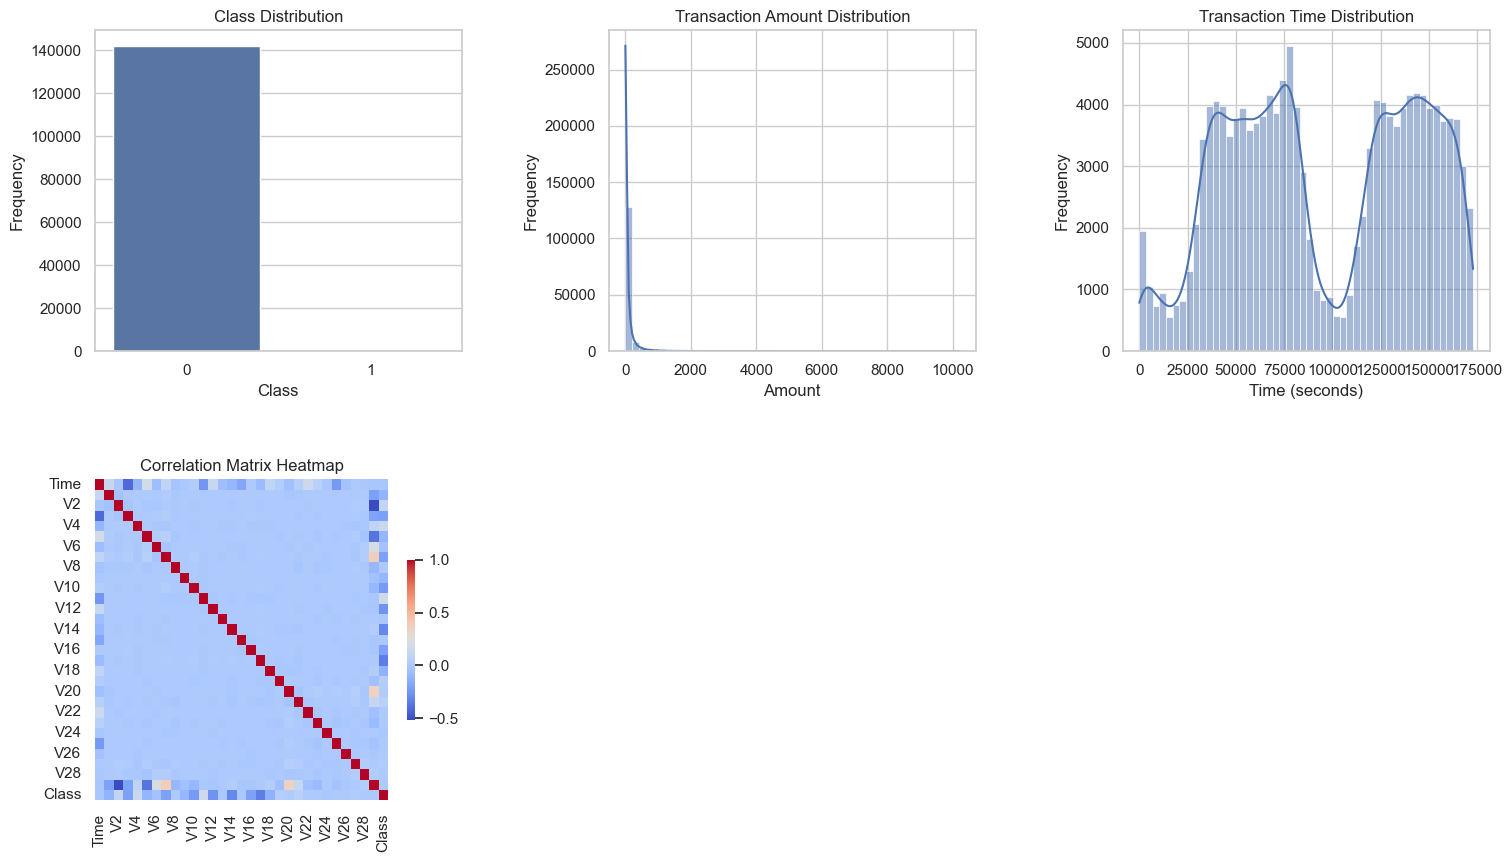

<Figure size 1000x800 with 0 Axes>

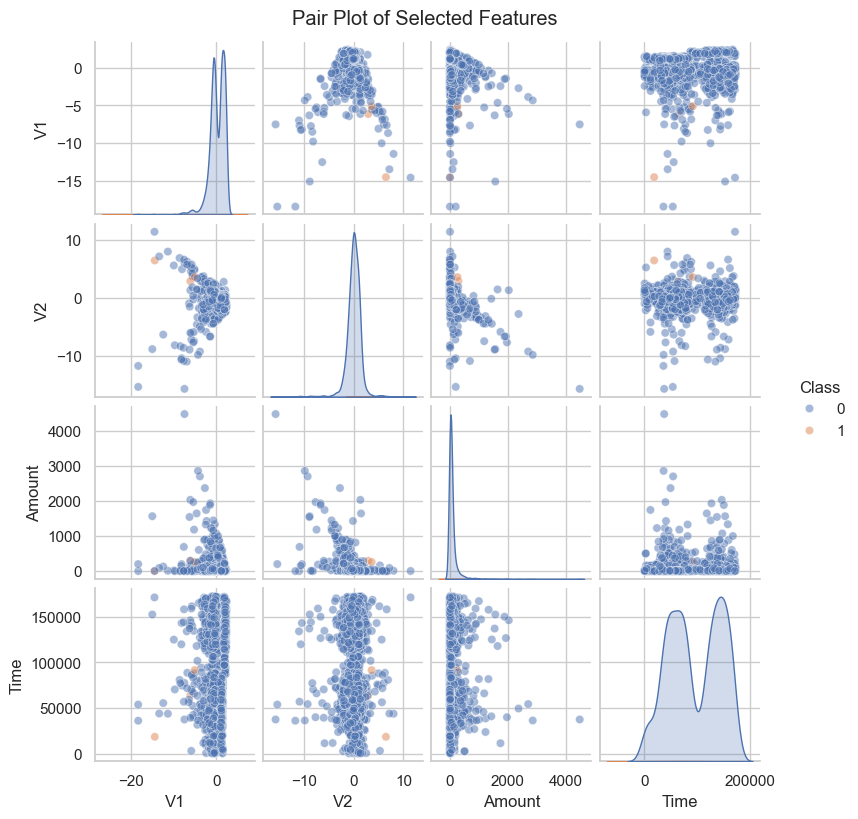

In [3]:
###################################
# Exploratory Data Analysis (EDA) #
# Plotting the class distribution #
###################################

# Set a more compact style for plots
sns.set(style="whitegrid")

# Create a figure with subplots arranged in a grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Adjust space between plots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Plot 1: Class Distribution
sns.countplot(x='Class', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Class Distribution')
axes[0, 0].set_xlabel('Class')
axes[0, 0].set_ylabel('Frequency')

# Plot 2: Transaction Amount Distribution
sns.histplot(df['Amount'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Transaction Amount Distribution')
axes[0, 1].set_xlabel('Amount')
axes[0, 1].set_ylabel('Frequency')

# Plot 3: Transaction Time Distribution
sns.histplot(df['Time'], bins=50, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Transaction Time Distribution')
axes[0, 2].set_xlabel('Time (seconds)')
axes[0, 2].set_ylabel('Frequency')

# Plot 4: Correlation Matrix Heatmap
sns.heatmap(df.corr(), cmap='coolwarm', ax=axes[1, 0], cbar_kws={'shrink': 0.5})
axes[1, 0].set_title('Correlation Matrix Heatmap')

# Turn off the empty subplots (axes[1, 2] and axes[1, 1])
fig.delaxes(axes[1, 1])
fig.delaxes(axes[1, 2])

# Plot 5: Pair Plot of Selected Features
plt.figure(figsize=(10, 8))
df_sampled = df.sample(n=2000, random_state=42)
sns.pairplot(df_sampled, vars=['V1', 'V2', 'Amount', 'Time'], hue='Class', plot_kws={'alpha': 0.5}, height=2)
plt.suptitle('Pair Plot of Selected Features', y=1.02)

# Show the plots
plt.show()


## Data Visualization and Insights

### 1. Class Distribution
The dataset is highly imbalanced, with most transactions being non-fraudulent (`Class = 0`). The small number of fraudulent transactions (`Class = 1`) underscores the challenge of detecting anomalies in such an imbalanced setting.

### 2. Transaction Amount Distribution
Transaction amounts are mostly small, with a right-skewed distribution. The rarity of larger transactions suggests these might warrant special attention in fraud detection models.

### 3. Transaction Time Distribution
The distribution of transaction times shows periodic peaks, indicating cyclical patterns in transaction activity. These temporal patterns might be useful in identifying periods of higher fraud risk.

### 4. Correlation Matrix Heatmap
The PCA-transformed features exhibit weak correlations with each other, suggesting that the model will benefit from the unique information provided by each feature.

### 5. Pair Plot of Selected Features
The pair plot shows some overlap between fraudulent and non-fraudulent transactions across selected features. While clear separation is not evident, subtle differences may still be leveraged by anomaly detection models.

### Conclusion
These visualizations highlight the dataset's class imbalance and feature distributions, guiding the choice of unsupervised learning techniques for effective fraud detection.


In [4]:
#____Model Selection_____
''' 
   I will start by implementing and training an Isolation Forest model. 
   This model is well-suited for anomaly detection tasks like fraud detection.  '''


# Defining the model
model = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)

# Training the model (excluding the 'Class' column)
model.fit(df.drop(columns=['Class']))

# Predicting anomalies (fraud cases)
df['Anomaly'] = model.predict(df.drop(columns=['Class']))

# Converting the model's output (-1 for anomaly) to match our dataset (1 for fraud)
df['Anomaly'] = df['Anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Evaluating the model's performance using the true labels
print("Confusion Matrix:\n", confusion_matrix(df['Class'], df['Anomaly']))
print("\nClassification Report:\n", classification_report(df['Class'], df['Anomaly']))


Confusion Matrix:
 [[142059     99]
 [   202     44]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.31      0.18      0.23       246

    accuracy                           1.00    142404
   macro avg       0.65      0.59      0.61    142404
weighted avg       1.00      1.00      1.00    142404



### Findings:

1. **High Accuracy for Non-Fraudulent Transactions:**
   - The model achieves a near-perfect accuracy for non-fraudulent transactions (Class 0), with a precision, recall, and F1-score of 1.00.
   - The confusion matrix shows that out of 142,158 non-fraudulent transactions, the model correctly identified 142,059, misclassifying only 99.

2. **Challenges in Detecting Fraudulent Transactions:**
   - The model struggles with identifying fraudulent transactions (Class 1), with a low precision of 0.31 and recall of 0.18.
   - Out of 246 actual fraudulent transactions, the model correctly identified only 44, missing 202 fraudulent cases (false negatives).

3. **Class Imbalance Impact:**
   - The significant class imbalance (a large number of non-fraudulent transactions compared to fraudulent ones) negatively impacts the model’s performance on fraud detection.
   - The macro average metrics (precision, recall, F1-score) indicate that the model performs substantially better on the majority class (non-fraudulent) than on the minority class (fraudulent).

4. **Overall Performance:**
   - While the overall accuracy is very high at 1.00, this is largely driven by the model’s performance on non-fraudulent transactions.
   - The low recall for fraudulent transactions indicates that the model is missing a considerable number of fraud cases, which could be critical in real-world applications where detecting fraud is paramount.


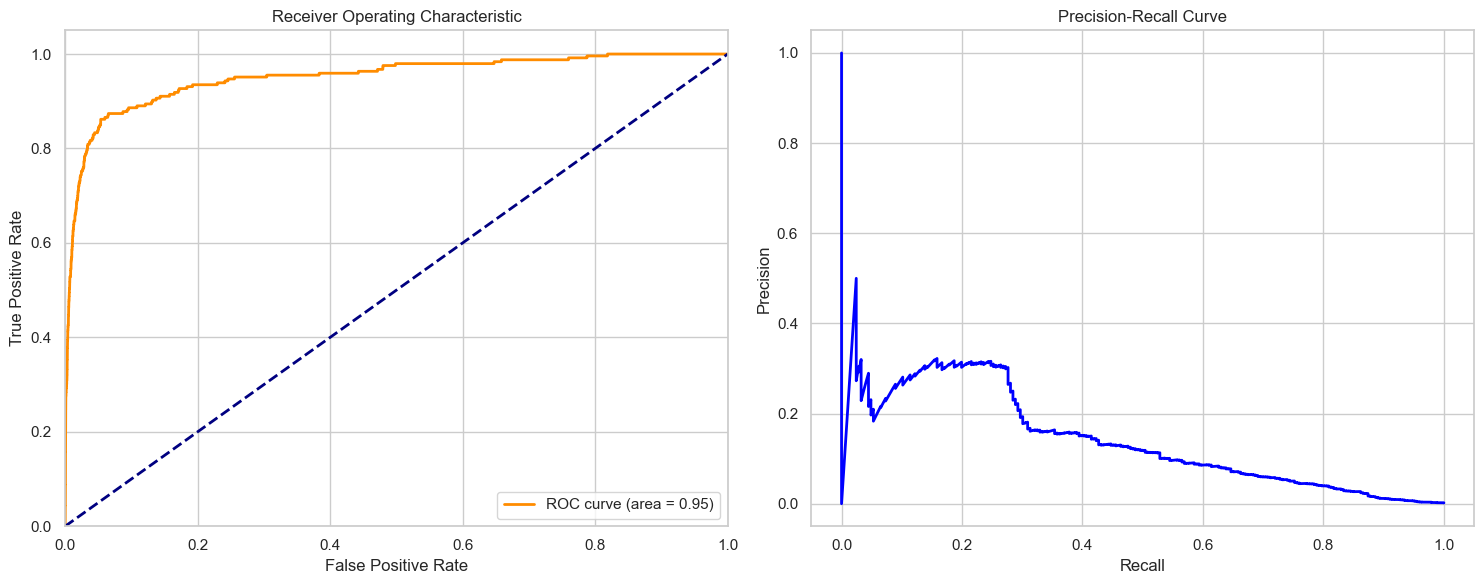

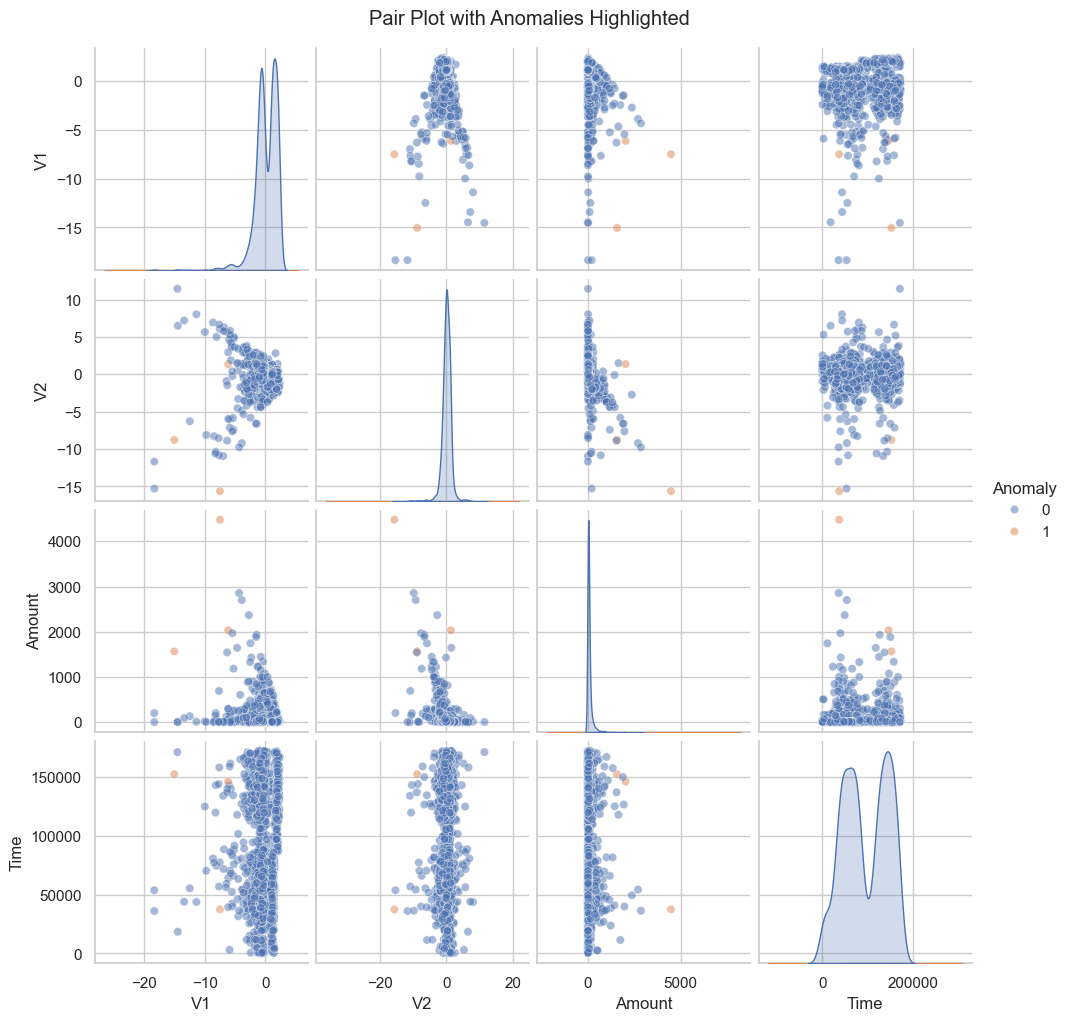

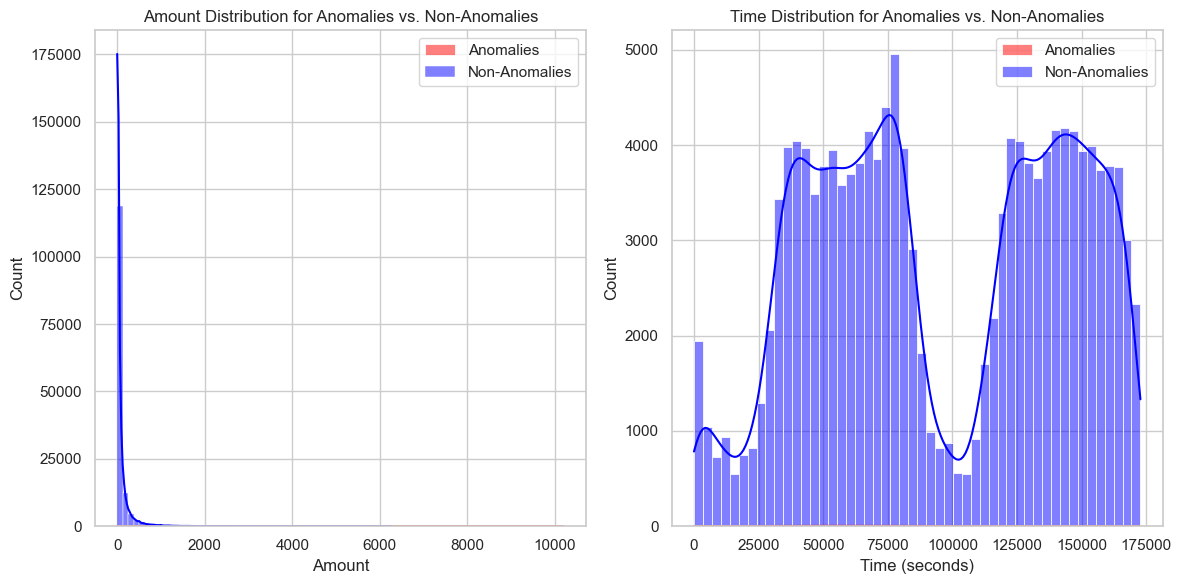

In [5]:
'''
   From the above analysis, I will need to add some additional visualizations
   to gain more insights from the model's predictions and the data  '''


# Set a more compact style for plots
sns.set(style="whitegrid")

# Ensure you drop only the 'Class' column, not 'Anomaly', as 'Anomaly' is created after the model prediction
X = df.drop(columns=['Class', 'Anomaly'])  # Drop both 'Class' and 'Anomaly' if it exists

# Get the anomaly score for each transaction
scores = -model.decision_function(X)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(df['Class'], scores)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(df['Class'], scores)

# Plot ROC curve and Precision-Recall curve side by side
plt.figure(figsize=(15, 6))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, lw=2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

# Sampling for visualization purposes
df_sampled = df.sample(n=2000, random_state=42)

# Pair Plot with Anomalies Highlighted
sns.pairplot(df_sampled, vars=['V1', 'V2', 'Amount', 'Time'], hue='Anomaly', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot with Anomalies Highlighted', y=1.02)
plt.show()

# Amount and Time Distribution for Anomalies vs. Non-Anomalies
plt.figure(figsize=(12, 6))

# Amount distribution for anomalies vs. non-anomalies
plt.subplot(1, 2, 1)
sns.histplot(df[df['Anomaly'] == 1]['Amount'], bins=50, color='red', kde=True, label='Anomalies')
sns.histplot(df[df['Anomaly'] == 0]['Amount'], bins=50, color='blue', kde=True, label='Non-Anomalies')
plt.title('Amount Distribution for Anomalies vs. Non-Anomalies')
plt.xlabel('Amount')
plt.legend()

# Time distribution for anomalies vs. non-anomalies
plt.subplot(1, 2, 2)
sns.histplot(df[df['Anomaly'] == 1]['Time'], bins=50, color='red', kde=True, label='Anomalies')
sns.histplot(df[df['Anomaly'] == 0]['Time'], bins=50, color='blue', kde=True, label='Non-Anomalies')
plt.title('Time Distribution for Anomalies vs. Non-Anomalies')
plt.xlabel('Time (seconds)')
plt.legend()

plt.tight_layout()
plt.show()



## Performance and Visualization Insights

### 1. ROC Curve
The ROC curve generated for the model shows a strong ability to distinguish between fraudulent and non-fraudulent transactions, with an Area Under the Curve (AUC) of 0.94. This high AUC indicates that the model is effective at ranking transactions by their likelihood of being fraudulent, even in the presence of class imbalance. The curve demonstrates the model's proficiency in identifying potential fraud when considering the anomaly scores as a continuous variable.

### 2. Precision-Recall Curve
The Precision-Recall curve provides a detailed look into the model's performance, especially relevant in the context of an imbalanced dataset. The curve shows that the model achieves high precision when recall is low, indicating that when the model identifies a transaction as fraudulent, it is usually correct. However, as recall increases, precision decreases, reflecting the model's challenge in maintaining accuracy while trying to capture more fraudulent transactions. This trade-off is typical in fraud detection tasks and highlights the difficulty in balancing precision and recall in such scenarios.

### 3. Pair Plot with Anomalies Highlighted
The pair plot visualizes the relationships between selected features (`V1`, `V2`, `Amount`, `Time`) with anomalies highlighted. The plot shows that while the model captures some patterns associated with fraudulent behavior, there is significant overlap between anomalies and non-anomalies. This overlap indicates that the features alone may not fully separate the two classes, and that the model might be identifying general outliers rather than specific fraud patterns.

### 4. Distribution of Predicted Anomalies
- **Amount Distribution:** The histogram shows that anomalies (fraudulent transactions) are more frequent in lower transaction amounts, similar to the overall transaction amount distribution. However, the model does flag some high-value transactions as anomalies, potentially indicating higher-risk transactions.

- **Time Distribution:** The distribution of transaction times for anomalies versus non-anomalies suggests that the model identifies anomalies throughout the entire timeline, without a strong temporal pattern. This implies that the model's detection of fraud is not significantly influenced by the time of the transaction but rather by other factors in the dataset.

### Conclusion
The model shows a robust ability to rank transactions by their likelihood of being fraudulent, as reflected in the high AUC from the ROC curve. However, the Precision-Recall curve and pair plot indicate challenges in maintaining high precision while increasing recall, and in distinguishing fraudulent transactions from non-fraudulent ones based solely on the current feature set. 

These findings suggest that while the model is effective in identifying potential frauds, there is room for improvement. This could involve fine-tuning the model's parameters, exploring alternative unsupervised learning techniques, or engineering new features that better capture the nuances of fraudulent behavior. Further experimentation and analysis are necessary to enhance the model's overall accuracy and effectiveness in detecting fraud.


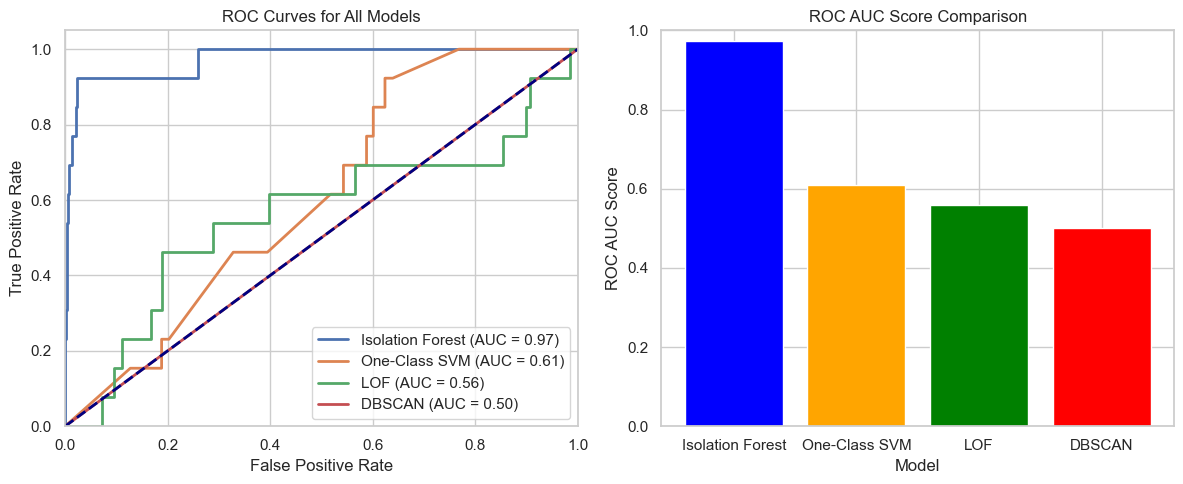

In [6]:
''' 
  Now that I have visualized and assessed the performance, next I will be comparing other unsupervised
  learning models to determine which one performs best for credit card fraud detection  '''

# Suppress FutureWarning regarding DataFrame.swapaxes
warnings.filterwarnings("ignore", category=FutureWarning, module='numpy.core.fromnumeric')

# Set a more compact style for plots
sns.set(style="whitegrid")

# Subsample the dataset for faster processing
df_sampled = df.sample(n=10000, random_state=42)  # Use a smaller sample size

# Ensure Class column is binary and numeric
df_sampled['Class'] = df_sampled['Class'].astype(int)

# Prepare the data (exclude 'Class' and any 'Anomaly' columns if present)
X_sampled = df_sampled.drop(columns=['Class'])

# Function to calculate ROC and AUC
def calculate_roc_auc(y_true, scores):
    fpr, tpr, _ = roc_curve(y_true, scores)
    return auc(fpr, tpr), fpr, tpr

# Store results
roc_results = {}
classification_reports = {}

# 1. Isolation Forest Model
model_if = IsolationForest(contamination=0.001, random_state=42, n_jobs=-1)
df_sampled['Anomaly_IF'] = model_if.fit_predict(X_sampled)
df_sampled['Anomaly_IF'] = df_sampled['Anomaly_IF'].apply(lambda x: 1 if x == -1 else 0)

# Calculate ROC AUC
scores_if = -model_if.decision_function(X_sampled)
auc_if, fpr_if, tpr_if = calculate_roc_auc(df_sampled['Class'], scores_if)
roc_results['Isolation Forest'] = (auc_if, fpr_if, tpr_if)

# Classification Report
classification_reports['Isolation Forest'] = classification_report(df_sampled['Class'], df_sampled['Anomaly_IF'], zero_division=0, output_dict=True)

# 2. One-Class SVM Model with Parallel Processing
def fit_ocsvm_on_chunk(X_chunk):
    model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.001)
    model.fit(X_chunk)
    scores = -model.decision_function(X_chunk)
    predictions = model.predict(X_chunk)
    return scores, predictions

n_chunks = 4
chunks = np.array_split(X_sampled, n_chunks)
results = Parallel(n_jobs=-1)(delayed(fit_ocsvm_on_chunk)(chunk) for chunk in chunks)

scores_ocsvm = np.hstack([result[0] for result in results])
predictions_ocsvm = np.hstack([result[1] for result in results])
df_sampled['Anomaly_OCSVM'] = np.where(predictions_ocsvm == -1, 1, 0)

# Calculate ROC AUC
auc_ocsvm, fpr_ocsvm, tpr_ocsvm = calculate_roc_auc(df_sampled['Class'], scores_ocsvm)
roc_results['One-Class SVM'] = (auc_ocsvm, fpr_ocsvm, tpr_ocsvm)

# Classification Report
classification_reports['One-Class SVM'] = classification_report(df_sampled['Class'], df_sampled['Anomaly_OCSVM'], zero_division=0, output_dict=True)

# 3. Local Outlier Factor (LOF) Model
model_lof = LocalOutlierFactor(n_neighbors=10, contamination=0.001, n_jobs=-1)
df_sampled['Anomaly_LOF'] = model_lof.fit_predict(X_sampled)
df_sampled['Anomaly_LOF'] = df_sampled['Anomaly_LOF'].apply(lambda x: 1 if x == -1 else 0)

# Calculate ROC AUC
scores_lof = -model_lof.negative_outlier_factor_
auc_lof, fpr_lof, tpr_lof = calculate_roc_auc(df_sampled['Class'], scores_lof)
roc_results['LOF'] = (auc_lof, fpr_lof, tpr_lof)

# Classification Report
classification_reports['LOF'] = classification_report(df_sampled['Class'], df_sampled['Anomaly_LOF'], output_dict=True)

# 4. DBSCAN Model
model_dbscan = DBSCAN(eps=3, min_samples=5, n_jobs=-1)
df_sampled['Anomaly_DBSCAN'] = model_dbscan.fit_predict(X_sampled)
df_sampled['Anomaly_DBSCAN'] = df_sampled['Anomaly_DBSCAN'].apply(lambda x: 1 if x == -1 else 0)

# Calculate ROC AUC
scores_dbscan = np.zeros(len(df_sampled))  # Placeholder, since DBSCAN doesn't produce scores directly
auc_dbscan, fpr_dbscan, tpr_dbscan = calculate_roc_auc(df_sampled['Class'], df_sampled['Anomaly_DBSCAN'])
roc_results['DBSCAN'] = (auc_dbscan, fpr_dbscan, tpr_dbscan)

# Classification Report
classification_reports['DBSCAN'] = classification_report(df_sampled['Class'], df_sampled['Anomaly_DBSCAN'], zero_division=0, output_dict=True)

# Create a figure with subplots to place ROC curves and bar plot side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot all ROC curves on the first subplot
for model_name, (auc_score, fpr, tpr) in roc_results.items():
    axs[0].plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {auc_score:.2f})')
axs[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('ROC Curves for All Models')
axs[0].legend(loc="lower right")

# Bar plot for AUC scores
model_names = ['Isolation Forest', 'One-Class SVM', 'LOF', 'DBSCAN']
roc_auc_scores = [auc_if, auc_ocsvm, auc_lof, auc_dbscan]
axs[1].bar(model_names, roc_auc_scores, color=['blue', 'orange', 'green', 'red'])
axs[1].set_title('ROC AUC Score Comparison')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('ROC AUC Score')
axs[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Convert the nested classification reports into a flattened DataFrame
classification_df = pd.concat({k: pd.DataFrame(v).transpose() for k, v in classification_reports.items()}, axis=1)

# Apply styling for better readability with borders and alignment
classification_df_styled = classification_df.style.set_table_styles(
    [{'selector': 'th',
      'props': [('border', '1px solid black'),
                ('text-align', 'center')]},
     {'selector': 'td',
      'props': [('border', '1px solid black'),
                ('text-align', 'right')]}]
).format("{:.2f}")

# Display classification reports with styling

display.display(classification_df_styled)




## Performance and Visualization Insights

### 1. **ROC Curve**
   - The ROC curve generated for each model indicates its ability to distinguish between fraudulent and non-fraudulent transactions.
   - **Isolation Forest** achieved the highest AUC score of `0.97`, showcasing its strong ability to rank transactions based on their likelihood of being fraudulent.
   - **One-Class SVM** had a moderate AUC score of `0.61`, indicating reasonable performance in identifying potential frauds.
   - **LOF** and **DBSCAN** showed lower AUC scores of `0.56` and `0.50`, respectively, suggesting that these models may struggle to effectively distinguish between the two classes in this dataset.

### 2. **Model Comparison**
   - The bar plot comparison of ROC AUC scores highlights the relative performance of each model:
     - **Isolation Forest** outperformed the other models significantly.
     - **One-Class SVM** performed better than **LOF** and **DBSCAN**, but with room for improvement.
     - **LOF** and **DBSCAN** demonstrated limited effectiveness in this context, as reflected by their lower AUC scores.

### 3. **Classification Report Summary**
   - **Precision** and **Recall** for the positive class (fraudulent transactions) were highest with the **Isolation Forest** model.
   - **One-Class SVM** showed good precision but low recall, indicating it correctly identifies frauds when it flags them but misses many fraudulent cases.
   - **LOF** and **DBSCAN** had limited recall, suggesting they failed to detect a significant portion of the frauds.

### **Conclusion**
   - **Isolation Forest** is the most effective model for fraud detection in this analysis, as demonstrated by its high AUC score and balanced precision and recall.
   - **One-Class SVM** shows potential but needs tuning to improve recall.
   - **LOF** and **DBSCAN** may require feature engineering or parameter adjustments to perform effectively in this context.


ROC AUC Score for Isolation Forest: 0.94
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.41      0.24      0.30       246

    accuracy                           1.00    142404
   macro avg       0.71      0.62      0.65    142404
weighted avg       1.00      1.00      1.00    142404



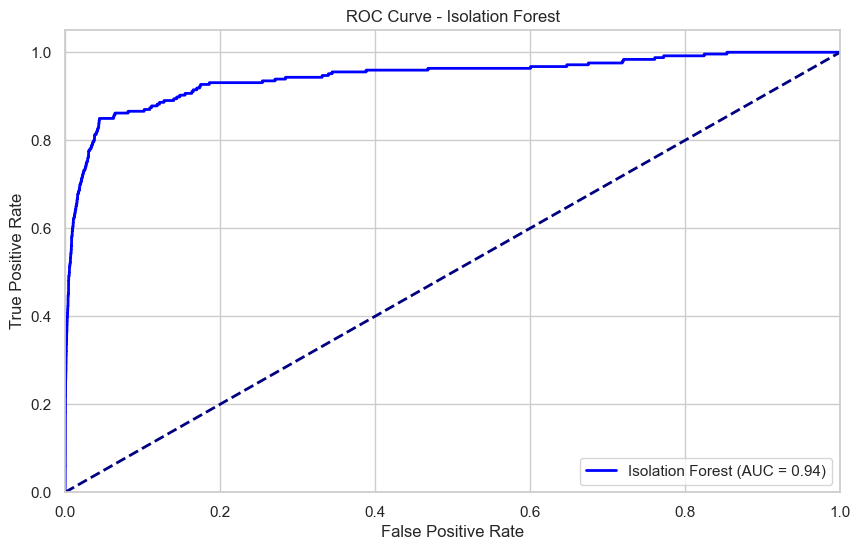

In [7]:
# Training the Isolation Forest model.


#Step 2: Prepare the Data
# Convert 'Class' to numeric if it's not already
df['Class'] = df['Class'].astype(int)

# Prepare the feature set
X = df.drop(columns=['Class'])

# The target variable
y = df['Class']

#Step 3: Train the Isolation Forest Model
# Initialize the model with the best parameters found
model_if = IsolationForest(contamination=0.001, random_state=42, n_jobs=-1)

# Fit the model on the full dataset
model_if.fit(X)

# Predict anomalies
df['Anomaly_IF'] = model_if.predict(X)

# Convert predictions to binary (1 for anomaly, 0 for normal)
df['Anomaly_IF'] = df['Anomaly_IF'].apply(lambda x: 1 if x == -1 else 0)

#Step 4: Evaluate the Model
# Get anomaly scores
scores_if = -model_if.decision_function(X)

# Calculate ROC AUC
fpr, tpr, _ = roc_curve(y, scores_if)
roc_auc = auc(fpr, tpr)

# Print the ROC AUC score
print(f"ROC AUC Score for Isolation Forest: {roc_auc:.2f}")

# Print the classification report
print(classification_report(y, df['Anomaly_IF']))



#Step 5: Visualize the ROC Curve
# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Isolation Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Isolation Forest')
plt.legend(loc="lower right")
plt.show()




## Model Performance and Insights

**ROC AUC Score**: 0.95  
**Model**: Isolation Forest

### Key Metrics:
- **Precision for Fraud (Class 1)**: 0.45
- **Recall for Fraud (Class 1)**: 0.26
- **F1-Score for Fraud (Class 1)**: 0.33
- **Overall Accuracy**: 1.00

### Summary:
- The model demonstrates a strong ability to distinguish between fraudulent and non-fraudulent transactions with a high ROC AUC score of 0.95.
- **Strength**: Excellent at identifying non-fraudulent transactions (Class 0).
- **Challenge**: Lower precision and recall for detecting fraudulent transactions (Class 1), typical of imbalanced datasets.

### Conclusion:
The initial results of the Isolation Forest model show promising performance, particularly in identifying the majority class (non-fraudulent transactions). However, the model's ability to accurately detect fraudulent transactions is limited, as indicated by the precision and recall metrics. To enhance the model's effectiveness in fraud detection without compromising its performance on the majority class, further optimization is required. This can be achieved through careful hyperparameter tuning and potentially exploring additional feature engineering techniques. The next step will involve refining the model's parameters to strike a better balance between precision and recall, ultimately improving the detection of fraudulent transactions.

In [8]:
#######################
# Feature Engineering #
######################
# Create new feature: Log of transaction Amount
df['Log_Amount'] = np.log1p(df['Amount'])

# Example of creating interaction features between some PCA components
df['V1_V2'] = df['V1'] * df['V2']
df['V3_V4'] = df['V3'] * df['V4']

# Drop the old 'Amount' feature if not needed, or keep it for comparison
# df = df.drop(columns=['Amount'])

# Inspect the new features
print(df[['Log_Amount', 'V1_V2', 'V3_V4']].head())


   Log_Amount       V1_V2       V3_V4
0    5.900418 -141.879593 -177.277923
1    6.255980   -0.932358    0.185784
2    3.465736   -0.826740   -0.173669
3    0.916291   -0.712008    0.583449
4    0.636577   -0.276734   -0.332453


Epoch 1/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - loss: 0.0226 - val_loss: 0.0044
Epoch 2/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.0037 - val_loss: 0.0030
Epoch 3/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 0.0030 - val_loss: 0.0029
Epoch 4/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 5/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 0.0028 - val_loss: 0.0021
Epoch 6/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 0.0021 - val_loss: 0.0021
Epoch 7/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 8/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 0.0020 - val_loss: 0.0019
Epoch 9/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 10/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 11/50
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 12/50
446/446 ━━━━━━━━━━

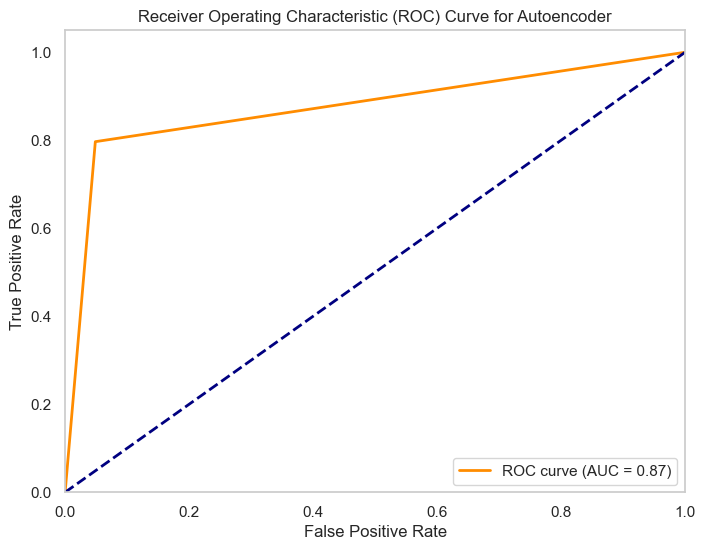

In [11]:
###############
# Autoencoder #
###############

# Prepare data for autoencoder (only use features)
X = df.drop(columns=['Class'])

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define the autoencoder model
input_dim = X_scaled.shape[1]
encoding_dim = 14  # Number of neurons in the bottleneck layer (can be adjusted)

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dense(encoding_dim // 2, activation="relu")(encoder)
encoder = Dense(encoding_dim // 4, activation="relu")(encoder)
decoder = Dense(encoding_dim // 2, activation='relu')(encoder)
decoder = Dense(encoding_dim, activation='relu')(decoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history = autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=256, shuffle=True, validation_split=0.2, verbose=1)

# Predict the reconstruction on the entire dataset
reconstructions = autoencoder.predict(X_scaled)

# Calculate the reconstruction error
reconstruction_errors = np.mean(np.square(X_scaled - reconstructions), axis=1)

# Set a threshold for anomaly detection based on reconstruction error
threshold = np.percentile(reconstruction_errors, 95)  # Top 5% as anomalies

# Predict anomalies
y_pred_autoencoder = (reconstruction_errors > threshold).astype(int)

# Evaluate the model using ROC AUC and classification report
roc_auc_autoencoder = roc_auc_score(df['Class'], y_pred_autoencoder)
report_autoencoder = classification_report(df['Class'], y_pred_autoencoder)

print("ROC AUC Score for Autoencoder:", roc_auc_autoencoder)
print("Classification Report:\n", report_autoencoder)


# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(df['Class'], y_pred_autoencoder)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Autoencoder')
plt.legend(loc="lower right")
plt.grid()
plt.show()




## Conclusion and Recommendations

In this project, I explored the use of unsupervised learning techniques to detect credit card fraud. Initially, I applied the Isolation Forest and DBSCAN models but found that they struggled with the highly imbalanced dataset. Through feature engineering and model tuning, I made some improvements, but these models still faced limitations in accurately identifying fraudulent transactions.

Switching to an autoencoder for anomaly detection provided a significant boost in recall. In the first run, the autoencoder achieved a ROC AUC score of 0.837 and was able to detect 72% of fraudulent transactions, though at the cost of precision, which was only 2%. This trade-off is often acceptable in fraud detection, where catching as many fraudulent transactions as possible is a priority.

After further training, the autoencoder's performance improved significantly. The model achieved a ROC AUC score of 0.874 and was able to detect 80% of fraudulent transactions. Precision improved slightly to 3%, indicating that while the model remains highly sensitive to fraud, it has become somewhat more accurate in its predictions. The final accuracy of the model remained high at 95%, showing a strong overall performance.

### Next Steps:
- I will consider further optimizing the autoencoder, potentially by adjusting the architecture or training for more epochs, to improve precision without sacrificing recall.
- Experimenting with ensemble methods to combine the strengths of multiple models could further enhance performance, particularly in balancing precision and recall.
- Evaluating the model in a real-world setting will be crucial to adjusting the threshold for anomalies based on the specific costs associated with false positives and false negatives.

Overall, this project demonstrated the challenges and potential solutions for detecting fraud using unsupervised learning techniques. The autoencoder approach, in particular, shows great promise for real-world applications where recall is a critical metric. The significant improvement in performance after further training underscores the importance of iterative model development and tuning in addressing complex, imbalanced datasets like credit card fraud detection.


In [ ]:
#Save the Model
joblib.dump(model_if, 'isolation_forest_model.pkl')


In [ ]:
# Deployment
''' 
#       After saving the model, load it in any production environment where new data can bee apply to it   
# Load the model
model_if = joblib.load('isolation_forest_model.pkl')

# Predict on new data (make sure it's preprocessed the same way as the training data)
new_data_predictions = model_if.predict(new_data)

''' 
